In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
from matplotlib.colors import rgb2hex
import mapclassify
import adjustText as aT
import matplotlib as mpl
import plotly.graph_objects as go


# incorporamos geopandas! geografía + pandas :)
import geopandas as gpd
from sklearn.preprocessing import normalize

%matplotlib inline
sns.set(context='notebook', font='Fira Sans', style='white', palette='plasma')
#https://plot.ly/python/v3/table/
#https://seaborn.pydata.org/tutorial/color_palettes.html
#http://colorbrewer2.org/#type=sequential&scheme=Greens&n=3

In [2]:
numeroRegion=13
numeroDivisiones=4

In [3]:
dataProsupuestoMunicipal = pd.read_excel('data/datos_municipales_Disponibilidad_Presupuesto_PerCapita.xls')
#dataProsupuestoMunicipal.head()

In [4]:
dataPobreza = pd.read_excel('data/Indice_Pobreza_Porcentaje_Casem2018.xlsx')
#dataPobreza.head()

In [5]:
zonas_eod = gpd.read_file('data/Comunas', encoding="utf-8",converters={'cod_comuna':str})

In [6]:
dataset = pd.merge(zonas_eod, dataPobreza, left_on='cod_comuna',right_on='CODIGO',how='inner') 
dataset = pd.merge(dataset, dataProsupuestoMunicipal, left_on='cod_comuna',right_on='CODIGO',how='inner') 

In [7]:
codigoRegion=13
datasetRegion=dataset[dataset['codregion']==numeroRegion]

In [44]:
datasetRegion.describe()


,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,CODIGO_x,Indice_Pobreza_Porcentaje_Casem2018,CODIGO_y,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018
count,52.000000,52.000000,52.00000,52.0,52.000000,52.0,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000
mean,658.711538,66006.686872,11.25000,7.0,13238.076923,13.0,4.279238e+08,79441.393642,13238.076923,7.540769,13238.076923,296.536346
std,2488.482720,80337.604929,2.26547,0.0,178.051309,0.0,1.065712e+09,96685.368678,178.051309,3.683568,178.051309,211.202146
min,288.000000,10795.433316,8.00000,7.0,13101.000000,13.0,9.056280e+06,12827.159439,13101.000000,0.030000,13101.000000,123.130000
25%,300.750000,15950.522176,9.00000,7.0,13113.750000,13.0,2.006871e+07,19784.416972,13113.750000,5.300000,13113.750000,165.677500
50%,314.500000,35927.946164,11.00000,7.0,13126.500000,13.0,7.931036e+07,43040.828641,13126.500000,7.855000,13126.500000,234.135000
75%,327.250000,87133.844224,14.00000,7.0,13401.250000,13.0,2.926474e+08,104754.580719,13401.250000,10.270000,13401.250000,331.357500
max,18258.000000,483095.202852,14.00000,7.0,13605.000000,13.0,7.223837e+09,582995.722046,13605.000000,14.540000,13605.000000,1008.340000


In [45]:
datasetRegion[datasetRegion['Comuna']=='Puente Alto'].head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,CODIGO_x,MUNICIPIO_x,Indice_Pobreza_Porcentaje_Casem2018,CODIGO_y,MUNICIPIO_y,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018
118,292,48961.65484,12,7,13201,13,1.269446e+08,58874.136921,Región Metropolitana de Santiago,Puente Alto,Cordillera,"POLYGON ((-7848546.332 -3968052.875, -7848478....",13201,PUENTE ALTO,8.02,13201,PUENTE ALTO,136.0


In [46]:
datasetRegion["center"] = datasetRegion["geometry"].centroid
datasetRegion_points = datasetRegion.copy()
datasetRegion_points.set_geometry("center", inplace = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
datasetRegion[['cod_comuna', 'Comuna']].values

array([[13129, 'San Joaquín'],
       [13130, 'San Miguel'],
       [13131, 'San Ramón'],
       [13108, 'Independencia'],
       [13109, 'La Cisterna'],
       [13122, 'Peñalolén'],
       [13123, 'Providencia'],
       [13113, 'La Reina'],
       [13403, 'Calera de Tango'],
       [13301, 'Colina'],
       [13101, 'Santiago'],
       [13302, 'Lampa'],
       [13202, 'Pirque'],
       [13201, 'Puente Alto'],
       [13107, 'Huechuraba'],
       [13401, 'San Bernardo'],
       [13503, 'Curacaví'],
       [13504, 'María Pinto'],
       [13102, 'Cerrillos'],
       [13103, 'Cerro Navia'],
       [13132, 'Vitacura'],
       [13104, 'Conchalí'],
       [13105, 'El Bosque'],
       [13106, 'Estación Central'],
       [13110, 'La Florida'],
       [13111, 'La Granja'],
       [13112, 'La Pintana'],
       [13114, 'Las Condes'],
       [13115, 'Lo Barnechea'],
       [13116, 'Lo Espejo'],
       [13117, 'Lo Prado'],
       [13118, 'Macul'],
       [13119, 'Maipú'],
       [13120, 'Ñuñoa'],
  

1

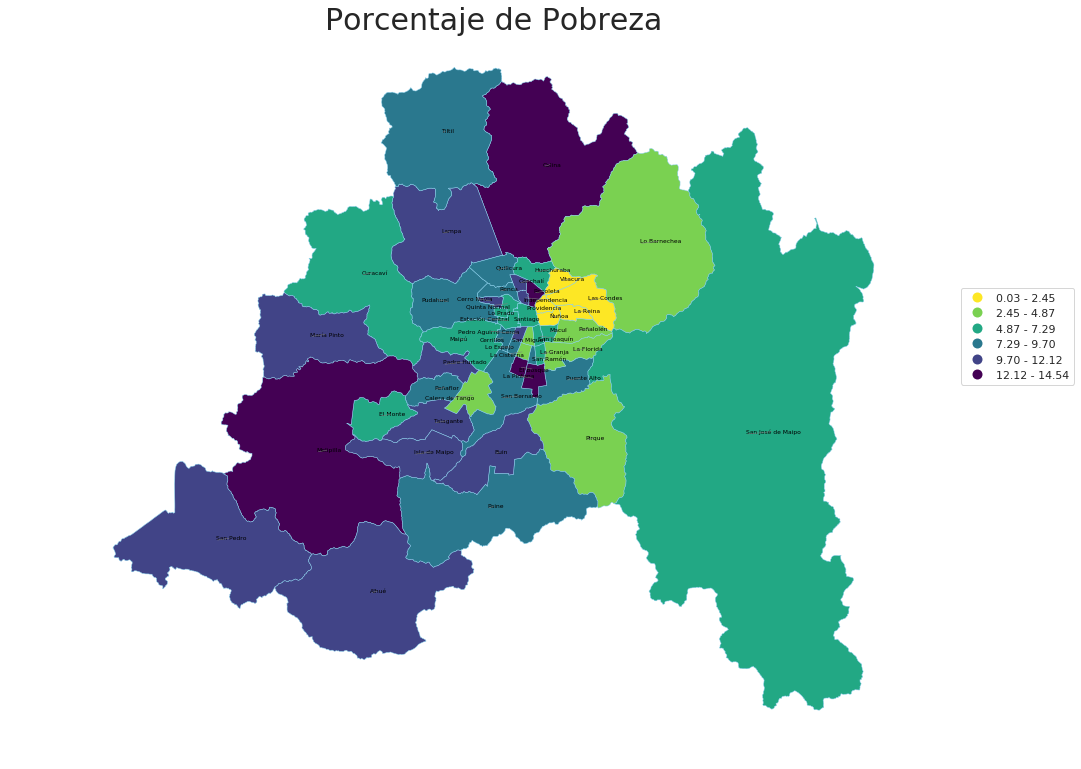

In [48]:
ax = datasetRegion.plot(figsize=(15, 15), column='Indice_Pobreza_Porcentaje_Casem2018', 
                         cmap='viridis_r', legend=True, linewidth=0.5, 
                         edgecolor='#87CEEB', scheme='Equal_Interval', k=6)

plt.title('Porcentaje de Pobreza', fontsize=30)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))




ax.set_axis_off()

texts = []
for x, y, label in zip(datasetRegion_points.geometry.x, datasetRegion_points.geometry.y, datasetRegion_points["Comuna"]):
    texts.append(plt.text(x, y, label, fontsize = 6,color='black'))

aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0), arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
#aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0))

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.

/anaconda3/lib/python3

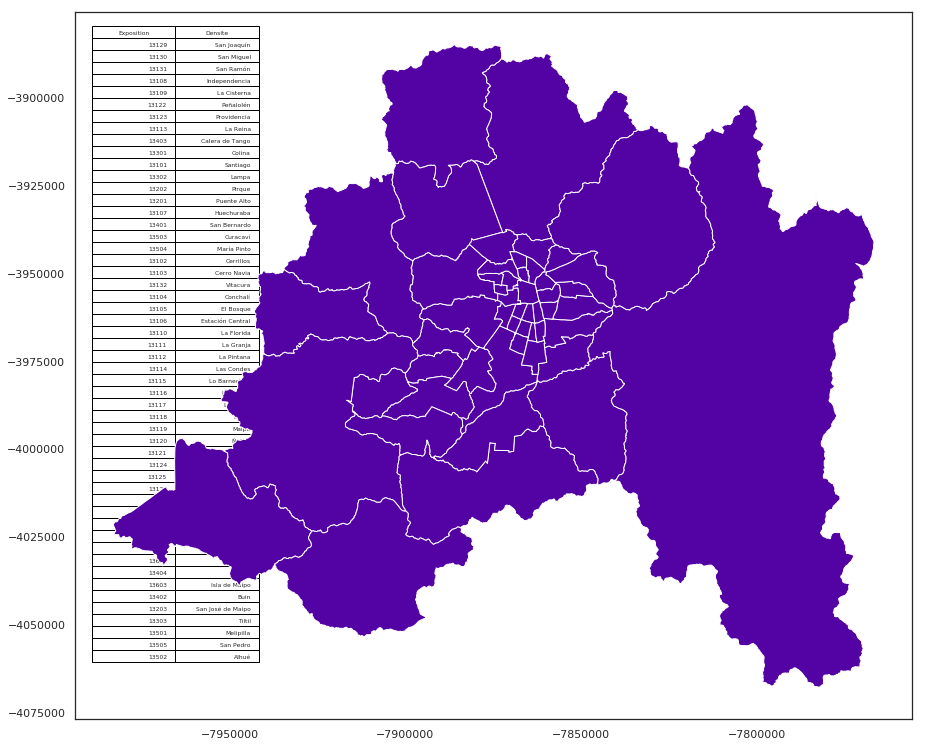

In [49]:
ax = datasetRegion.plot(figsize=(15, 15))
text=datasetRegion[['cod_comuna', 'Comuna']].values
colLabels = ["Exposition", u"Densite"]
tab = ax.table(cellText=text, colLabels=colLabels, colWidths = [0.1,0.1],    loc='upper left')
plt.show()
ax.set_axis_off()


1

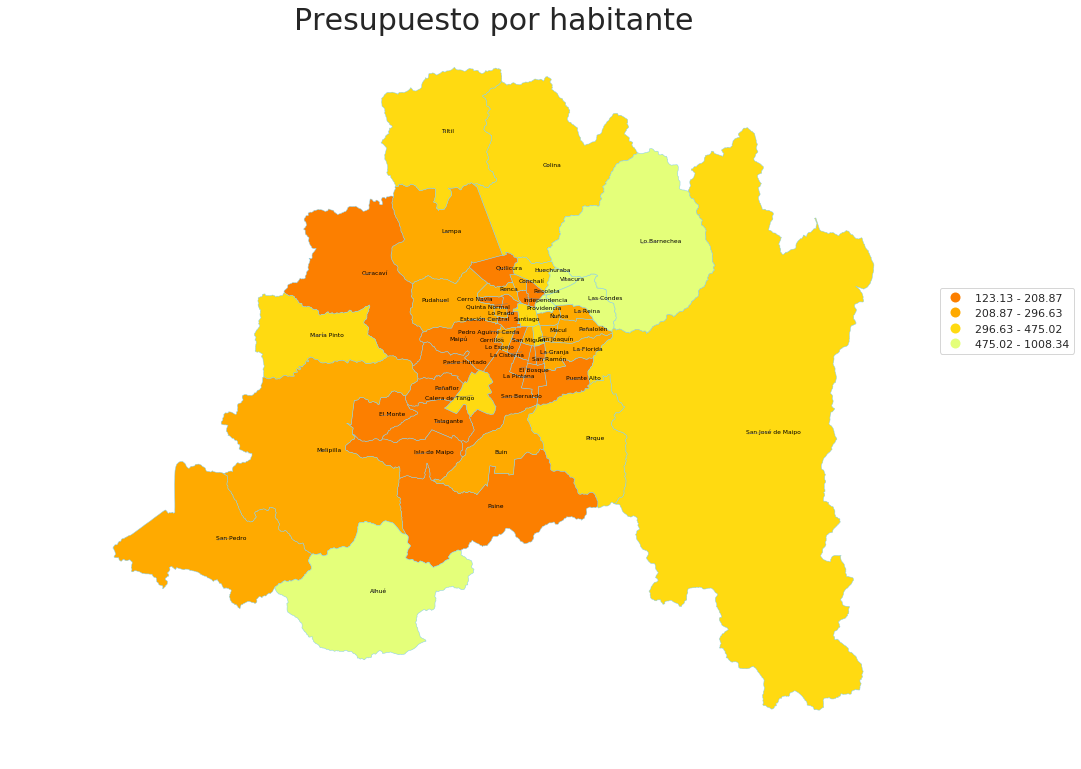

In [50]:
cmap = mpl.cm.Wistia
cmap_r = reverse_colourmap(cmap)

ax = datasetRegion.plot(figsize=(15, 15), column='IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018', 
                         cmap=cmap_r, legend=True, linewidth=0.5, 
                         edgecolor='#87CEEB', scheme='Fisher_Jenks', k=4)

plt.title('Presupuesto por habitante', fontsize=30)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))


ax.set_axis_off()

texts = []
for x, y, label in zip(datasetRegion_points.geometry.x, datasetRegion_points.geometry.y, datasetRegion_points["Comuna"]):
    texts.append(plt.text(x, y, label, fontsize = 6,color='black'))

aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0), arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
#aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0))